In [98]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('Credit_Risk.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Imbalanced Dataset
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

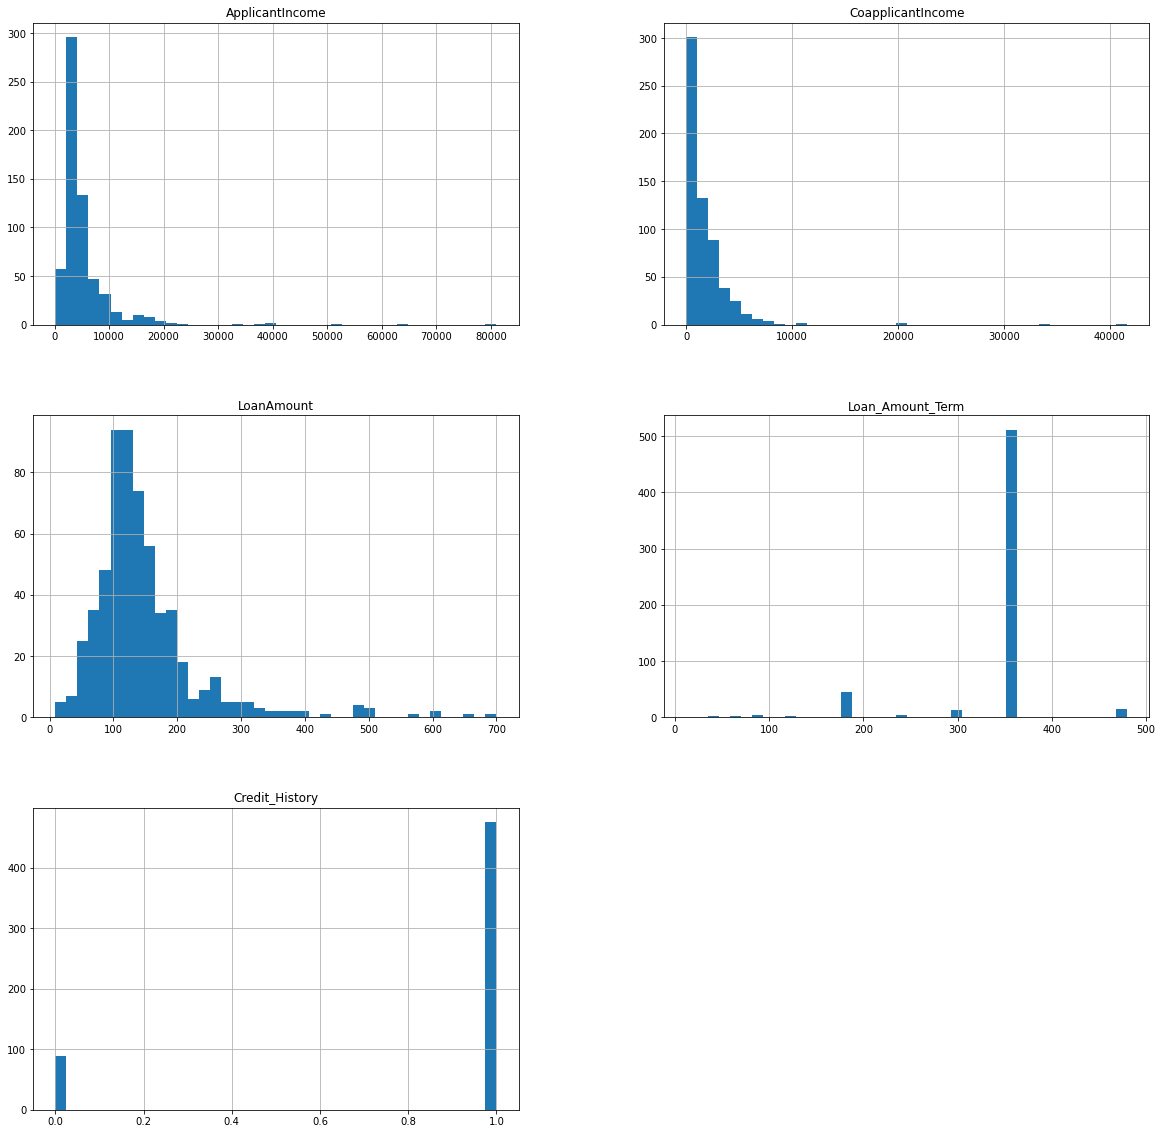

In [7]:
df.hist(bins=40 , figsize=(20,20))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

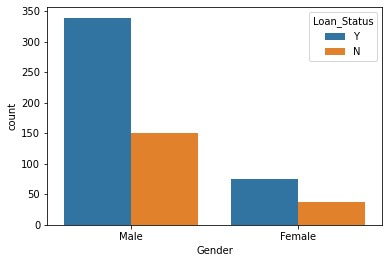

In [8]:
sns.countplot(x=df['Gender'], hue = df['Loan_Status'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

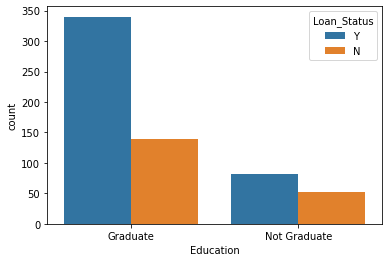

In [9]:
sns.countplot(x=df['Education'],hue = df['Loan_Status'])
plt.show

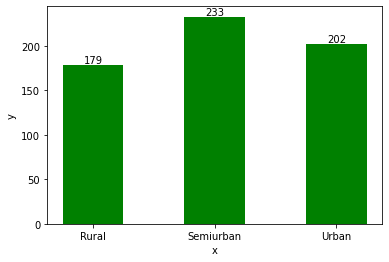

In [10]:
a = df.groupby('Property_Area')['Loan_ID'].count().reset_index()
x = a['Property_Area']
y = a['Loan_ID']
plt.bar(x,y,width = 0.5, color = 'green')
plt.xlabel('x')
plt.ylabel('y')
for x,y in enumerate(y):
    plt.text(x,y,f'{y}', ha = 'center', va = 'bottom')
plt.show()

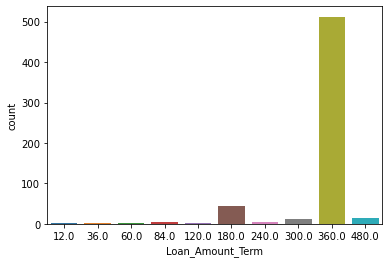

In [11]:
sns.countplot(x = df['Loan_Amount_Term'])
plt.show()

In [12]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

# Determining and filling Null values

In [13]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Filling null values

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)

In [15]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [16]:
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)
df['Gender'].replace('Male', 0,inplace=True)
df['Gender'].replace('Female', 1,inplace=True)
df['Married'].replace('No', 0,inplace=True)
df['Married'].replace('Yes', 1,inplace=True)
df['Self_Employed'].replace('No', 0,inplace=True)
df['Self_Employed'].replace('Yes', 1,inplace=True)
df['Credit_History'].replace('0', 0,inplace=True)
df['Credit_History'].replace('1', 1,inplace=True)
df['Education'].replace('Graduate', 0,inplace=True)
df['Education'].replace('Not Graduate', 1,inplace=True)
df['Credit_History'].replace('0', 0,inplace=True)
df['Credit_History'].replace('1', 1,inplace=True)
df['Dependents'].replace('3+', 3,inplace=True)

In [17]:
from category_encoders.one_hot import OneHotEncoder
a = OneHotEncoder(use_cat_names=True)
x = pd.DataFrame(a.fit_transform(df['Property_Area']))
df = df.join(x)


In [18]:
df.drop(['Property_Area'],inplace=True, axis = 1)


In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban
0,0.0,0.0,0,0,0.0,5849,0.0,128.0,360.0,1.0,1,1,0,0
1,0.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0
2,0.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0
3,0.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0
4,0.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,0,0.0,2900,0.0,71.0,360.0,1.0,1,0,1,0
610,0.0,1.0,3,0,0.0,4106,0.0,40.0,180.0,1.0,1,0,1,0
611,0.0,1.0,1,0,0.0,8072,240.0,253.0,360.0,1.0,1,1,0,0
612,0.0,1.0,2,0,0.0,7583,0.0,187.0,360.0,1.0,1,1,0,0


In [20]:
df_imput = df.copy()

In [21]:
knn_imputer = KNNImputer(n_neighbors = 1)

X = np.round(knn_imputer.fit_transform(df_imput))
df = pd.DataFrame(X, columns = df_imput.columns)

In [22]:
df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Urban        0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64

In [23]:
x = df.drop(['Loan_Status'],1)

In [24]:
y = df['Loan_Status']

In [25]:
y.shape

(614,)

Balanced Imbalanced dataset

In [26]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state = 1)
x, y = os.fit_resample(x,y)

In [27]:
x.shape

(844, 13)

In [28]:
y.shape

(844,)

Train-Test Splitting

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=1)

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 298 to 37
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   633 non-null    float64
 1   Married                  633 non-null    float64
 2   Dependents               633 non-null    float64
 3   Education                633 non-null    float64
 4   Self_Employed            633 non-null    float64
 5   ApplicantIncome          633 non-null    float64
 6   CoapplicantIncome        633 non-null    float64
 7   LoanAmount               633 non-null    float64
 8   Loan_Amount_Term         633 non-null    float64
 9   Credit_History           633 non-null    float64
 10  Property_Area_Urban      633 non-null    float64
 11  Property_Area_Rural      633 non-null    float64
 12  Property_Area_Semiurban  633 non-null    float64
dtypes: float64(13)
memory usage: 69.2 KB


Standard Scaling

In [31]:
num_cols = df[['ApplicantIncome','CoapplicantIncome','LoanAmount',
'Loan_Amount_Term']]
sc = StandardScaler()

for i in num_cols:
 scale = sc.fit(x_train[[i]])  
 x_train[i] = scale.transform(x_train[[i]])
 x_test[i] = scale.transform(x_test[[i]])

In [32]:
pca = PCA(n_components = 0.97)
x_pca = pca.fit(x_train)
x_train = x_pca.transform(x_train)
x_test = x_pca.transform(x_test)

# Logistic Regression

In [33]:
logistic_model = LogisticRegression(solver='liblinear',random_state = 1)

In [34]:
logistic_model.fit(x_train,y_train)
log_pred = logistic_model.predict(x_test)

In [35]:
log_conf_matrix = pd.DataFrame(confusion_matrix(y_test,log_pred))
print(log_conf_matrix)

    0   1
0  68  46
1  16  81


In [36]:
logistic= classification_report(y_test,log_pred)
print(logistic)

              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       114
         1.0       0.64      0.84      0.72        97

    accuracy                           0.71       211
   macro avg       0.72      0.72      0.71       211
weighted avg       0.73      0.71      0.70       211



In [37]:
print('Logistic model train score:', logistic_model.score(x_train,y_train))
print('Logistic model test score:', logistic_model.score(x_test,y_test))

Logistic model train score: 0.7203791469194313
Logistic model test score: 0.7061611374407583


In [73]:
roc_auc_score(y_test, log_pred)


0.7157713872309641

In [74]:
y_scores_LR = cross_val_predict(logistic_model, x_train, y_train, cv=3,
                             method="decision_function")

ROC AUC CURVE

In [75]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores_LR)

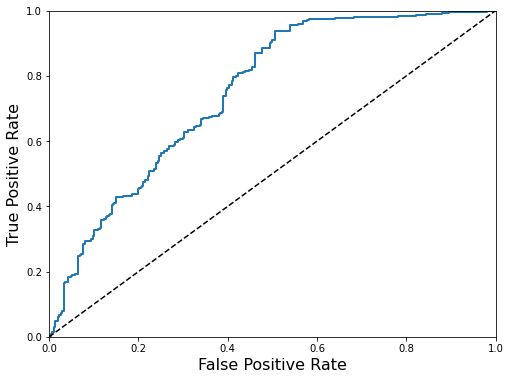

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# KNN

In [46]:
error_rate = []
for i in range(1,60):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train, y_train)
    pred_i = KNN.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error (misclassification) Rate')

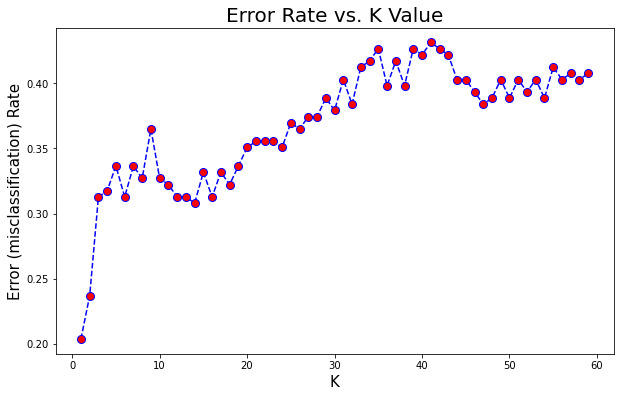

In [47]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

In [65]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)

In [66]:
print('KNN model train score:', KNN.score(x_train, y_train))
print('KNN model test score:', KNN.score(x_test,y_test))

KNN model train score: 1.0
KNN model test score: 0.7962085308056872


In [83]:
knn_report= classification_report(y_test,KNN_pred)
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       114
         1.0       0.81      0.73      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.79      0.79       211
weighted avg       0.80      0.80      0.80       211



In [116]:
KNN_matrix = pd.DataFrame(confusion_matrix(y_test,KNN_pred))
print(KNN_matrix)

    0   1
0  97  17
1  26  71


ROC AUC CURVE

In [117]:
y_scores_KNN = cross_val_predict(KNN, x_train, y_train, cv=3)
fpr, tpr, thresholds = roc_curve(y_train, y_scores_KNN)

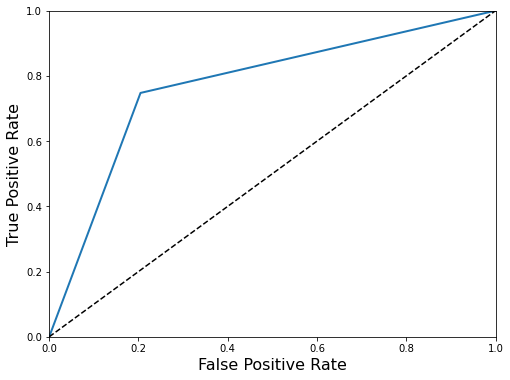

In [118]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# XGBoost

In [87]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(learning_rate =0.1,
 n_estimators=800,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.5,
 colsample_bytree=0.5,
 objective= 'binary:logistic',
 eval_metric = 'auc',                  
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgboost.fit(x_train, y_train)
xgboost_pred = xgboost.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [88]:
XGBoost = classification_report(y_test,xgboost_pred)
matrix_XGBoost = pd.DataFrame(confusion_matrix(y_test,xgboost_pred))
roc_auc_XGBoost = roc_auc_score(y_test, xgboost_pred)
print(XGBoost)
print(matrix_XGBoost)
print(roc_auc_XGBoost)

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86       114
         1.0       0.86      0.77      0.82        97

    accuracy                           0.84       211
   macro avg       0.84      0.83      0.84       211
weighted avg       0.84      0.84      0.84       211

     0   1
0  102  12
1   22  75
0.8339663591969615


In [89]:
xgboost_score_train = xgboost.score(x_train,y_train)
xgboost_score_test = xgboost.score(x_test,y_test)
print(xgboost_score_train,xgboost_score_test)

1.0 0.8388625592417062


In [113]:
y_scores_XGB = cross_val_predict(xgboost , x_train, y_train, cv=3)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of lab

ROC AUC Curve

In [114]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores_XGB)

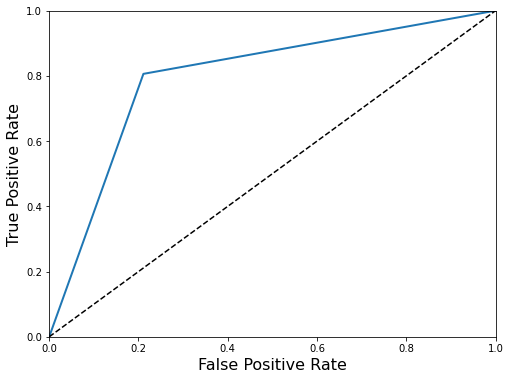

In [115]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [121]:
Desicion_tree = DecisionTreeClassifier(max_depth=14, random_state=42)
Desicion_tree.fit(x_train,y_train)
Desicion_tree_pred = Desicion_tree.predict(x_test)

In [122]:
Desicion_tree_matrix = pd.DataFrame(confusion_matrix(y_test,Desicion_tree_pred))
print(Desicion_tree_matrix)

     0   1
0  102  12
1   21  76


In [123]:
Desicion_tree_report = classification_report(y_test,Desicion_tree_pred)
print(Desicion_tree)

DecisionTreeClassifier(max_depth=14, random_state=42)


ROC AUC CURVE

In [126]:
y_scores_DT = cross_val_predict(Desicion_tree , x_train, y_train, cv=4)
fpr, tpr, thresholds = roc_curve(y_train, y_scores_DT)

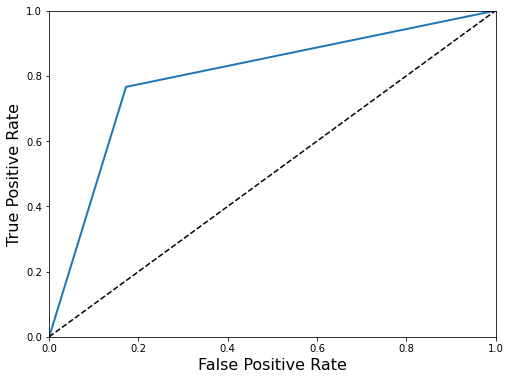

In [127]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [104]:
print('Logistic model train score:', Desicion_tree.score(x_train,y_train))
print('Logistic model test score:', Desicion_tree.score(x_test,y_test))

Logistic model train score: 0.9921011058451816
Logistic model test score: 0.8436018957345972


In [128]:
score = [logistic_model.score(x_test,y_test),
         KNN.score(x_test,y_test),
         xgboost.score(x_test,y_test),
        Desicion_tree.score(x_test,y_test)]
Models = pd.DataFrame({
    'Models': [ "Logistic Regression", "KNN","XGBoost","Desicion Tree" ],
    'Score': score})
Models.sort_values(by='Score', ascending=False)


,Models,Score
3,Desicion Tree,0.843602
2,XGBoost,0.838863
1,KNN,0.796209
0,Logistic Regression,0.706161


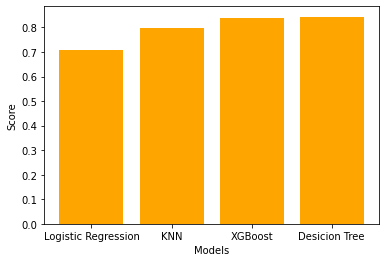

In [129]:
plt.bar(Models.Models,Models.Score, color = 'orange')
plt.xlabel('Models')
plt.ylabel('Score')

plt.show()